<a href="https://colab.research.google.com/github/isadoraxaavier/trabalho_estatistica/blob/Livia/Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo dentro do Drive
path = "/content/drive/MyDrive/Netflix (2).xlsx"

# Ler o Excel
df = pd.read_excel(path)

# Exibir as primeiras linhas
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,show_id,type,title,director,cast,country,date_added,release_year,rating,Classificação equivalente no Brasil,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,12 anos,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [75]:
# 🔎 Diagnóstico inicial da base Netflix
print("📌 Informações gerais:\n")
print("Formato (linhas, colunas):", df.shape)
print("\nNomes das colunas:\n", df.columns.tolist())

print("\n🔍 Tipos de dados e nulos:\n")
print(df.info())

print("\n🔍 Quantidade de valores nulos por coluna:\n")
print(df.isna().sum())

print("\n📌 Primeiras linhas da base:\n")
display(df.head())

# Número total de registros
print("Total de linhas no DataFrame:", len(df))

# Conferir se há linhas duplicadas ou perdidas
print("Linhas duplicadas:", df.duplicated().sum())

# Conferir se há valores nulos na coluna 'type' (às vezes corta no final)
print("Valores nulos em 'type':", df['type'].isna().sum())

📌 Informações gerais:

Formato (linhas, colunas): (8808, 13)

Nomes das colunas:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'Classificação equivalente no Brasil', 'duration', 'listed_in', 'description']

🔍 Tipos de dados e nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   show_id                              8807 non-null   object 
 1   type                                 8807 non-null   object 
 2   title                                8790 non-null   object 
 3   director                             6173 non-null   object 
 4   cast                                 7982 non-null   object 
 5   country                              7976 non-null   object 
 6   date_added                           8797 non-null   object 
 7   relea

,show_id,type,title,director,cast,country,date_added,release_year,rating,Classificação equivalente no Brasil,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,12 anos,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,18 anos,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,18 anos,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Total de linhas no DataFrame: 8808
Linhas duplicadas: 0
Valores nulos em 'type': 1


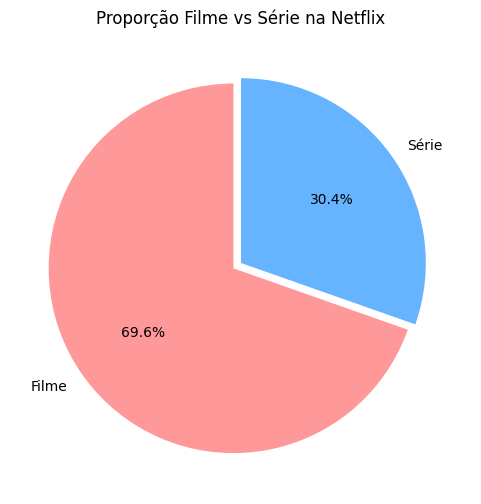

Total de linhas no DataFrame: 8807
Linhas duplicadas: 0
Valores nulos em 'type': 1


In [87]:
import matplotlib.pyplot as plt

# Normaliza e traduz os tipos
tipos = (df['type'].astype(str).str.strip()
         .replace({'Movie':'Filme', 'TV Show':'Série'}))

# Mantém só Filme/Série e conta
contagem = tipos[tipos.isin(['Filme','Série'])].value_counts()

# Garante ordem (se existir)
ordem = [x for x in ['Filme','Série'] if x in contagem.index]
contagem = contagem[ordem]

# explode do mesmo tamanho da série (destaque só o primeiro segmento)
explode = [0.05] + [0]*(len(contagem)-1)

plt.figure(figsize=(6,6))
plt.pie(contagem.values,
        labels=contagem.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'][:len(contagem)],
        explode=explode)

plt.title("Proporção Filme vs Série na Netflix")
plt.show()

# Número total de registros
print("Total de linhas no DataFrame:", len(df))

# Conferir se há linhas duplicadas ou perdidas
print("Linhas duplicadas:", df.duplicated().sum())

# Conferir se há valores nulos na coluna 'type' (às vezes corta no final)
print("Valores nulos em 'type':", df['type'].isna().sum())

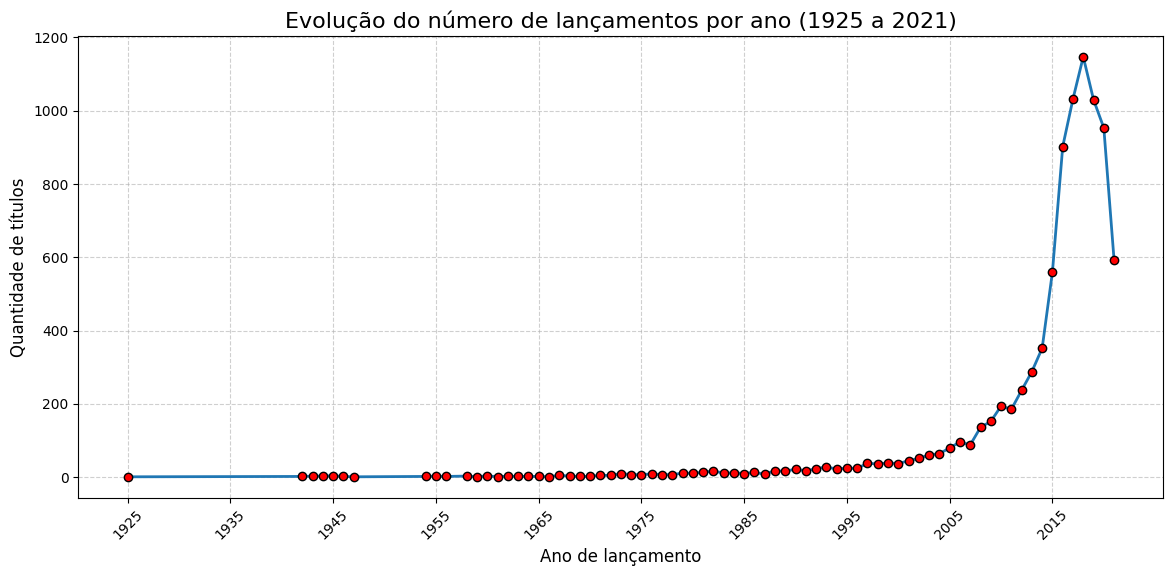

Total de linhas no DataFrame: 8807
Linhas duplicadas: 0
Valores nulos em 'type': 1


In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Remover linhas sem release_year
df = df.dropna(subset=['release_year'])

# Garantir que os anos sejam inteiros
df['release_year'] = df['release_year'].astype(int)

# Descobrir o primeiro e o último ano presentes no Excel
ano_min = df['release_year'].min()
ano_max = df['release_year'].max()

# Contar lançamentos por ano
lancamentos_por_ano = df['release_year'].value_counts().sort_index()

# Criar gráfico
plt.figure(figsize=(14,6))
plt.plot(lancamentos_por_ano.index, lancamentos_por_ano.values,
         marker='o', linestyle='-', linewidth=2,
         markerfacecolor='red', markeredgecolor='black')

# Configurações
plt.title(f"Evolução do número de lançamentos por ano ({ano_min} a {ano_max})", fontsize=16)
plt.xlabel("Ano de lançamento", fontsize=12)
plt.ylabel("Quantidade de títulos", fontsize=12)

# Eixo X de 10 em 10 anos
plt.xticks(np.arange(ano_min, ano_max+1, 10), rotation=45)

# Eixo Y de 200 em 200 títulos
plt.yticks(np.arange(0, lancamentos_por_ano.max()+200, 200))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Número total de registros
print("Total de linhas no DataFrame:", len(df))

# Conferir se há linhas duplicadas ou perdidas
print("Linhas duplicadas:", df.duplicated().sum())

# Conferir se há valores nulos na coluna 'type' (às vezes corta no final)
print("Valores nulos em 'type':", df['type'].isna().sum())


Q1=87.0, Q2=99.0, Q3=115.0, DIQ=28.0
Limite inferior=45.0, Limite superior=157.0


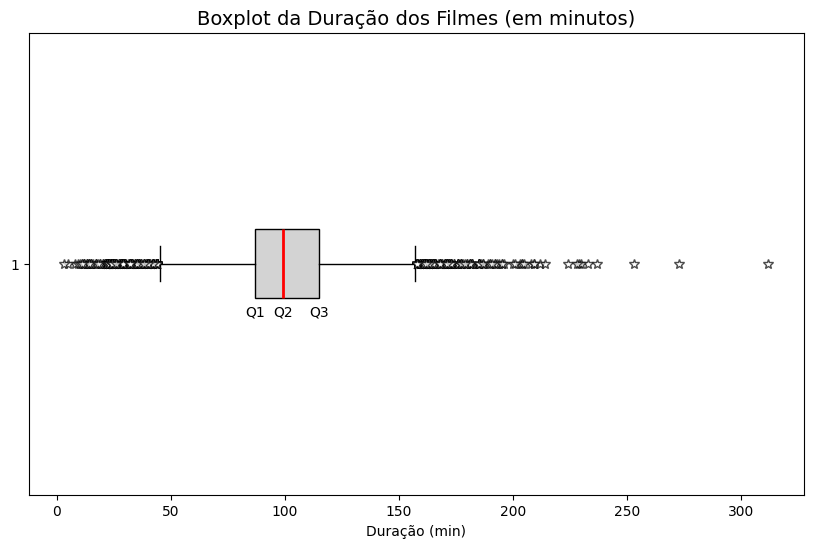

Total de linhas no DataFrame: 8807
Linhas duplicadas: 0
Valores nulos em 'type': 1


In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Garantir que a coluna 'duration' é string
df['duration'] = df['duration'].astype(str)

# Filtrar apenas filmes
filmes = df[df['type'].str.contains("Movie", case=False, na=False)].copy()

# Extrair apenas os números da duração
filmes['duration_min'] = pd.to_numeric(
    filmes['duration'].str.extract(r'(\d+)')[0], errors='coerce'
)

# Remover valores nulos e zeros
filmes = filmes.dropna(subset=['duration_min'])
filmes = filmes[filmes['duration_min'] > 0]

duracoes = filmes['duration_min'].values

# Calcular quartis e limites
q1 = np.percentile(duracoes, 25)
q2 = np.percentile(duracoes, 50)  # mediana
q3 = np.percentile(duracoes, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Q1={q1:.1f}, Q2={q2:.1f}, Q3={q3:.1f}, DIQ={iqr:.1f}")
print(f"Limite inferior={limite_inferior:.1f}, Limite superior={limite_superior:.1f}")

# Criar boxplot
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(duracoes, vert=False, patch_artist=True,
           boxprops=dict(facecolor="lightgray", color="black"),
           medianprops=dict(color="red", linewidth=2),
           whiskerprops=dict(color="black"),
           capprops=dict(color="black"),
           flierprops=dict(marker='*', markersize=7, markeredgecolor='black',
                           markerfacecolor='white', alpha=0.7))

# Configurações
ax.set_title("Boxplot da Duração dos Filmes (em minutos)", fontsize=14)
ax.set_xlabel("Duração (min)")

# --- Q1, Q2, Q3 logo abaixo da caixa (distância fixa) ---
offset_pt = -30  # ajuste fino: -10 (mais perto) a -18 (mais longe)

for x, label in [(q1, "Q1"), (q2, "Q2"), (q3, "Q3")]:
    ax.annotate(label,
                xy=(x, 1),                # posição do ponto na caixa (y=1)
                xytext=(0, offset_pt),    # desloca para baixo em pontos
                textcoords='offset points',
                ha='center', va='top', fontsize=10)

plt.show()

# Número total de registros
print("Total de linhas no DataFrame:", len(df))

# Conferir se há linhas duplicadas ou perdidas
print("Linhas duplicadas:", df.duplicated().sum())

# Conferir se há valores nulos na coluna 'type' (às vezes corta no final)
print("Valores nulos em 'type':", df['type'].isna().sum())

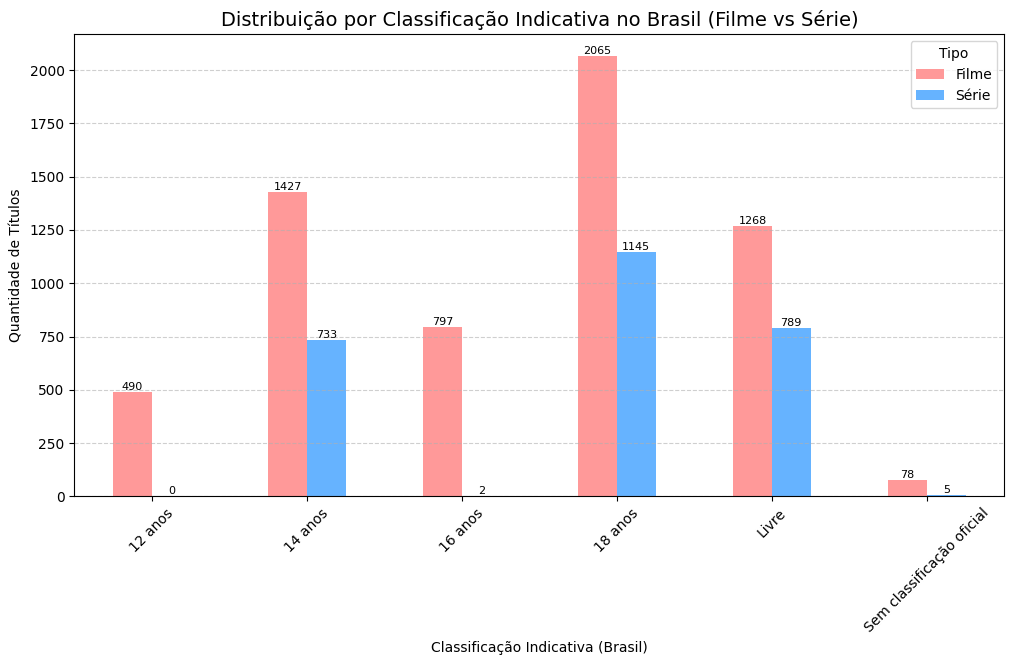

Total de linhas no DataFrame: 8807
Linhas duplicadas: 0
Valores nulos em 'type': 1


In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Contagem por Classificação (Brasil) e Tipo, ignorando NaN automaticamente
contagem = (
    df.groupby(["Classificação equivalente no Brasil", "type"], dropna=True)
      .size()
      .unstack(fill_value=0)
)

# Traduzir nomes de tipo
contagem = contagem.rename(columns={"Movie":"Filme", "TV Show":"Série"})

# Gráfico de barras agrupadas
ax = contagem.plot(kind="bar", figsize=(12,6), color=["#ff9999","#66b3ff"])

plt.title("Distribuição por Classificação Indicativa no Brasil (Filme vs Série)", fontsize=14)
plt.xlabel("Classificação Indicativa (Brasil)")
plt.ylabel("Quantidade de Títulos")
plt.xticks(rotation=45)
plt.legend(title="Tipo")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adicionar valores em cima das barras
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=8)

plt.show()

# Número total de registros
print("Total de linhas no DataFrame:", len(df))

# Conferir se há linhas duplicadas ou perdidas
print("Linhas duplicadas:", df.duplicated().sum())

# Conferir se há valores nulos na coluna 'type' (às vezes corta no final)
print("Valores nulos em 'type':", df['type'].isna().sum())


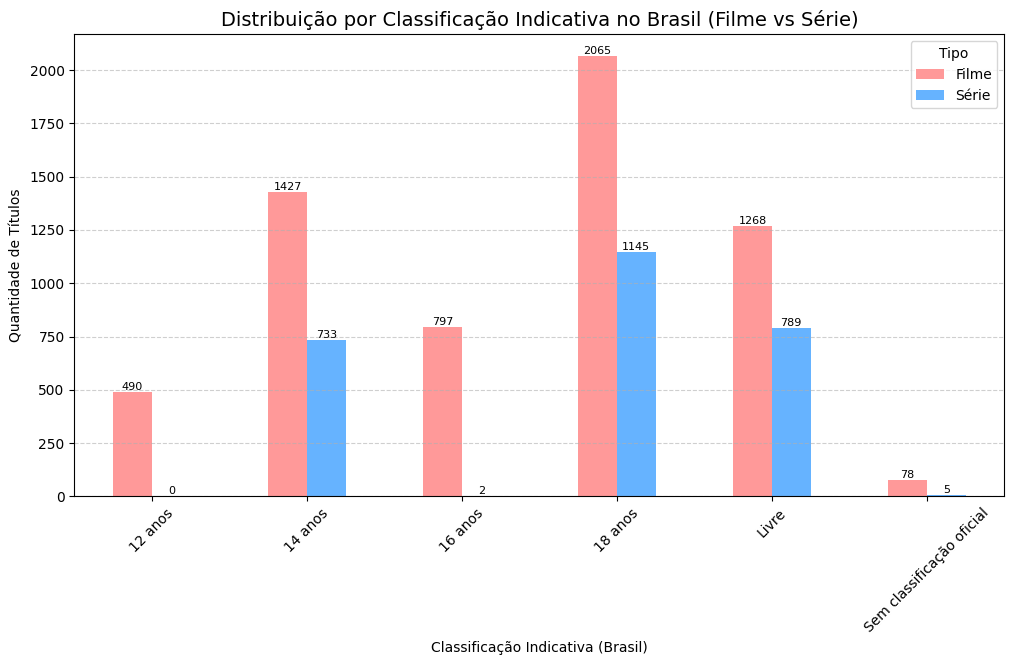

Total de linhas no DataFrame: 8807
Linhas duplicadas: 0
Valores nulos em 'type': 1


In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Criar um DataFrame limpo (sem NaN nas colunas usadas)
df_limpo = df.dropna(subset=["Classificação equivalente no Brasil", "type"])
df_limpo = df_limpo[df_limpo["type"].isin(["Movie", "TV Show"])]

# 🔹 Contagem por Classificação (Brasil) e Tipo
contagem = df_limpo.groupby(["Classificação equivalente no Brasil", "type"]).size().unstack(fill_value=0)

# 🔹 Traduzir nomes de tipo
contagem = contagem.rename(columns={"Movie":"Filme", "TV Show":"Série"})

# 🔹 Gráfico de barras agrupadas
ax = contagem.plot(kind="bar", figsize=(12,6), color=["#ff9999","#66b3ff"])

plt.title("Distribuição por Classificação Indicativa no Brasil (Filme vs Série)", fontsize=14)
plt.xlabel("Classificação Indicativa (Brasil)")
plt.ylabel("Quantidade de Títulos")
plt.xticks(rotation=45)
plt.legend(title="Tipo")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 🔹 Adicionar valores em cima das barras
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=8)

plt.show()

# Número total de registros
print("Total de linhas no DataFrame:", len(df))

# Conferir se há linhas duplicadas ou perdidas
print("Linhas duplicadas:", df.duplicated().sum())

# Conferir se há valores nulos na coluna 'type' (às vezes corta no final)
print("Valores nulos em 'type':", df['type'].isna().sum())